# Heavy Rain - IFS
---

In this evaluation, we will focus on rainfall and mean sea level pressure from 31 January to 3 February 2025. The example shows analysis of the following parameters:
- [`msl`](https://codes.ecmwf.int/grib/param-db/151) mean sea level pressure, and
- [`tp`](https://codes.ecmwf.int/grib/param-db/228) total precipitation of the **IFS** ensemble products.

:::{tip}
If you have not visited the [Heavy Rain - AIFS](./heavy-rain-aifs.ipynb) website yet, we highly recommend you to do so before proceeding further with the analysis.
:::

## 1. Set Up Your Environment and Find ECMWF Open Data
If the packages are not installed yet, uncomment the code below and run it.

In [ ]:
# !pip3 install earthkit ecmwf-opendata xarray

In [6]:
from ecmwf.opendata import Client
import earthkit.data as ekd
import xarray as xr
import earthkit.plots as ekp

(content:references:listParam)=
### List of parameters to retrieve from open datasets
The selected values below can be modified.
- Parameters available on a single level:

In [7]:
PARAM_SFC = "tp"
LEVELTYPE = "sfc"

DATES = [20250131]
TIME = 0
STEPS = 120
STREAM = "enfo"
TYPE = ["cf", "pf"]
MODEL = "ifs"

To calculate [ensemble mean and spread](https://confluence.ecmwf.int/display/FUG/Section+8.1.2+ENS+Mean+and+Spread), we need both the `cf` and `pf` type. This means that we will download the control forecast as well as all 50 ensemble members. <br>
In this case, the ensemble median is more suited than ensemble mean, because the precipitation parameter usually has skewed distributions.  

(content:references:getData)=
### Get the data using the ECMWF Open Data API

In [8]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. Ensemble median for total precipitation

The `tp` parameter and `step=120` give information about total accumulated rainfall from 00 UTC up to 5 days ahead.

In [9]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select IFS model data from 31 January 2025
ds = ekd.from_source("file", list_of_files[0])
ds.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,tp,surface,0,20250131,0,0-120,pf,14,regular_ll
1,ecmf,tp,surface,0,20250131,0,0-120,pf,23,regular_ll
2,ecmf,tp,surface,0,20250131,0,0-120,pf,32,regular_ll
3,ecmf,tp,surface,0,20250131,0,0-120,pf,50,regular_ll
4,ecmf,tp,surface,0,20250131,0,0-120,pf,41,regular_ll
5,ecmf,tp,surface,0,20250131,0,0-120,pf,33,regular_ll
6,ecmf,tp,surface,0,20250131,0,0-120,pf,6,regular_ll
7,ecmf,tp,surface,0,20250131,0,0-120,pf,24,regular_ll
8,ecmf,tp,surface,0,20250131,0,0-120,pf,42,regular_ll
9,ecmf,tp,surface,0,20250131,0,0-120,pf,15,regular_ll


When using the `describe()` method, a selected parameter will be described.

In [10]:
ds.describe("tp")

shortName,tp
typeOfLevel,surface
level,0
date,20250131
time,0
step,120
number,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50"
paramId,228
class,od
stream,enfo
type,"pf,cf"


We will calculate the median of all the ensemble members and convert the units to milimeters by multiplying the data by 1000.

:::{note}
GRIB ensemble forecast data will be converted to Xarray using `to_xarray()` method. [Here](https://earthkit-data.readthedocs.io/en/latest/examples/xarray_engine_ensemble.html) you can find out more about ensemble data and `earthkit-data` package.
:::

:::{important}
[To convert Xarray back to GRIB](https://earthkit-data.readthedocs.io/en/latest/examples/xarray_engine_to_grib.html), we set global Xarray `keep_attrs` option to copy variable attributes into a modified Xarray dataset. They are needed for the Xarray to GRIB conversion.
:::

In [12]:
xr.set_options(keep_attrs=True)

dsx = ds.to_xarray()
tpx = dsx['tp']
median_tp = tpx.median("number") * 1000
median_tp = median_tp.assign_attrs(tpx.attrs)
median_tp.attrs['units'] = 'mm'
median_tp

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)> Size: 8MB
array([[5.31005859, 5.31005859, 5.31005859, ..., 5.31005859, 5.31005859,
        5.31005859],
       [5.27954102, 5.24902344, 5.24902344, ..., 5.27954102, 5.27954102,
        5.27954102],
       [5.40161133, 5.40161133, 5.40161133, ..., 5.40161133, 5.40161133,
        5.40161133],
       ...,
       [0.54931641, 0.54931641, 0.54931641, ..., 0.54931641, 0.54931641,
        0.54931641],
       [0.85449219, 0.85449219, 0.85449219, ..., 0.85449219, 0.85449219,
        0.85449219],
       [0.2746582 , 0.2746582 , 0.2746582 , ..., 0.2746582 , 0.2746582 ,
        0.2746582 ]], shape=(721, 1440))
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    standard_name:  unknown
    long_name:      Total precipitation
    units:          mm
    _earthkit:      {'message': b'GRIB\xff\xff\x00\x02\x00\x00\x00\x00\x00\x0...

After calculating the ensemble median, we can convert the Xarray dataset into a GRIB fieldlist using `to_fieldlist()`. The `head()` method displays up to 5 messages. When using `n` as a keyword argument, we can list any number of rows (if they are available).

In [13]:
tp = median_tp.earthkit.to_fieldlist()
tp.head()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,tp,surface,0,20250131,0,0-120,cf,0,regular_ll


## 3. Ensemble mean and spread for mean sea level pressure

The input values can also be set [here](#content:references:listParam).

In [14]:
PARAM_SFC = "msl"
LEVELS = []
LEVELTYPE = "sfc"

DATES = [20250131]
TIME = 0
STEPS = 72
STREAM = "enfo"
TYPE = ["cf", "pf"]
MODEL = "ifs"

In [15]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select IFS model data from 31 January 2025
ds_msl = ekd.from_source("file", list_of_files[0])
ds_msl.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,meanSea,0,20250131,0,72,pf,27,regular_ll
1,ecmf,msl,meanSea,0,20250131,0,72,pf,45,regular_ll
2,ecmf,msl,meanSea,0,20250131,0,72,pf,18,regular_ll
3,ecmf,msl,meanSea,0,20250131,0,72,pf,9,regular_ll
4,ecmf,msl,meanSea,0,20250131,0,72,pf,36,regular_ll
5,ecmf,msl,meanSea,0,20250131,0,72,pf,37,regular_ll
6,ecmf,msl,meanSea,0,20250131,0,72,pf,1,regular_ll
7,ecmf,msl,meanSea,0,20250131,0,72,pf,46,regular_ll
8,ecmf,msl,meanSea,0,20250131,0,72,pf,19,regular_ll
9,ecmf,msl,meanSea,0,20250131,0,72,pf,28,regular_ll


We will plot mean sea level pressure data in hPa, therefore we need to divide them by 100.
- ensemble mean

In [16]:
dsx = ds_msl.to_xarray()
mslx = dsx['msl']
mean_msl = mslx.mean("number") / 100
mean_msl = mean_msl.assign_attrs(mslx.attrs)
mean_msl.attrs['units'] = 'hPa'
mean_msl

<xarray.DataArray 'msl' (latitude: 721, longitude: 1440)> Size: 8MB
array([[ 984.708125  ,  984.708125  ,  984.708125  , ...,  984.708125  ,
         984.708125  ,  984.708125  ],
       [ 984.43753676,  984.43596814,  984.43283088, ...,  984.44930147,
         984.44694853,  984.44067402],
       [ 984.01400735,  984.00616422,  983.99832108, ...,  984.03439951,
         984.02420343,  984.01636029],
       ...,
       [1012.34890931, 1012.35439951, 1012.35832108, ..., 1012.33322304,
        1012.33714461, 1012.34185049],
       [1013.10420343, 1013.10577206, 1013.10655637, ..., 1013.09871324,
        1013.10028186, 1013.1026348 ],
       [1012.90185049, 1012.90185049, 1012.90185049, ..., 1012.90185049,
        1012.90185049, 1012.90185049]], shape=(721, 1440))
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          hPa
    _earthkit:      {'message': b'GRIB\xff\xff\x00\x02\x00\x00\x00\x00\x00\x0...

In [17]:
msl = mean_msl.earthkit.to_fieldlist()
msl.describe("msl")

shortName,msl
typeOfLevel,meanSea
level,0
date,20250131
time,0
step,72
paramId,151
class,od
stream,enfo
type,cf
experimentVersionNumber,0001


- ensemble spread

In [18]:
spread_msl = mslx.std("number") / 100
spread_msl = spread_msl.assign_attrs(mslx.attrs)
spread_msl.attrs['units'] = 'hPa'
spread_msl

<xarray.DataArray 'msl' (latitude: 721, longitude: 1440)> Size: 8MB
array([[4.65463986, 4.65463986, 4.65463986, ..., 4.65463986, 4.65463986,
        4.65463986],
       [4.66974747, 4.67063552, 4.67085929, ..., 4.66862675, 4.66759503,
        4.66711745],
       [4.68393807, 4.68791142, 4.68749155, ..., 4.68400611, 4.68440665,
        4.68283458],
       ...,
       [1.08843251, 1.08984146, 1.08775971, ..., 1.08808302, 1.08707048,
        1.08680026],
       [1.19467691, 1.19340221, 1.19349838, ..., 1.19125214, 1.19189004,
        1.1932432 ],
       [1.10553088, 1.10553088, 1.10553088, ..., 1.10553088, 1.10553088,
        1.10553088]], shape=(721, 1440))
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          hPa
    _earthkit:      {'message': b'GRIB\xff\xff\x00\x02\x00\x00\x00\x00\x00\x0...

In [19]:
msl_std = spread_msl.earthkit.to_fieldlist()
msl_std.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,meanSea,0,20250131,0,72,cf,0,regular_ll


## 4. Data visualisation

The plot below shows analysis of ensemble median for total precipitation on 31 January 2025.

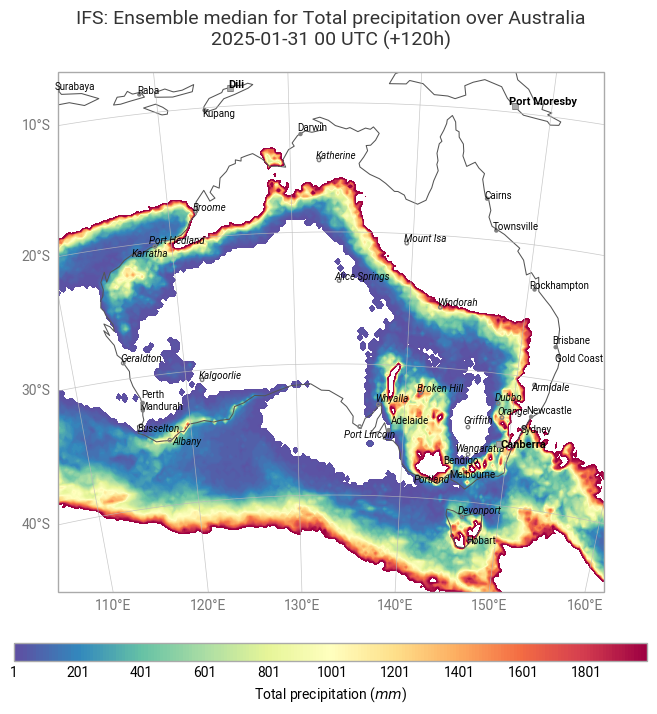

In [65]:
chart = ekp.Map(domain="Australia")

tp_style = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(1, 2000, 10),
    units="mm",
)

chart.contourf(tp, style=tp_style)

chart.coastlines(resolution="low")
chart.gridlines()
chart.cities(adjust_labels=True)

chart.legend(location="bottom", label="{variable_name} ({units})")

chart.title(
    "IFS: Ensemble median for {variable_name} over {domain}\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)
chart.save(f"./plots/{PARAM_SFC}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
chart.show()

The plot below show analysis of ensemble mean and spread for mean sea level pressure on 31 January at 00 UTC and for `step=72`.

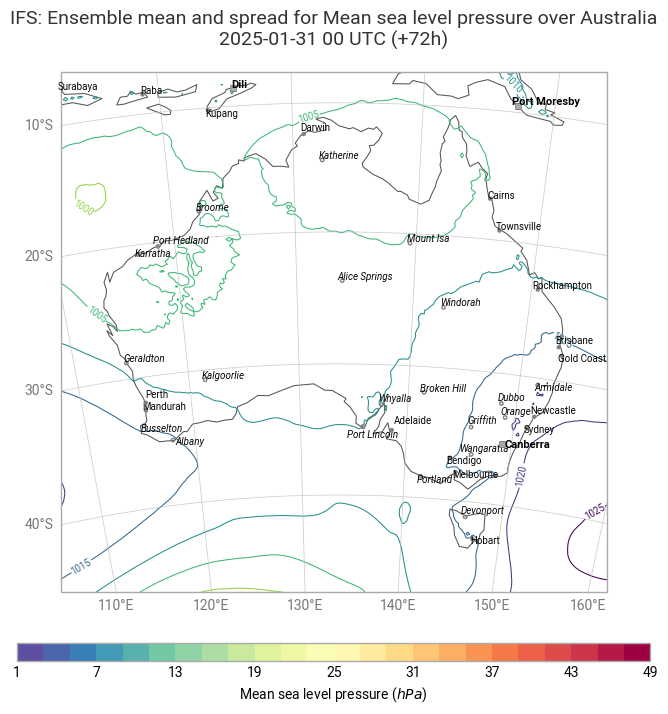

In [27]:
chart = ekp.Map(domain="Australia")

mslstd_style = ekp.styles.Style(
    colors="Spectral_r",
    levels=range(1, 50, 2),
    units="hPa",
)

chart.contourf(msl_std, style=mslstd_style)
chart.contour(msl, legend_style="None")

chart.coastlines(resolution="low")
chart.gridlines()
chart.cities(adjust_labels=True)

chart.legend(location="bottom", label="{variable_name} ({units})")

chart.title(
    "IFS: Ensemble mean and spread for {variable_name} over {domain}\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)
chart.save(f"./plots/{PARAM_SFC}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
chart.show()